## 고랭지 배추의 생존 전략 제안

고랭지 배추가 어떻게 되고 있ek. 배추 가격이 폭등했다는 걸 보여주기. 단어 구름으로 표현하는게 좋겠어.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.font_manager as fm
from tkinter.font import BOLD
import statsmodels.api as sm



# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()

In [104]:
# 단어 구름 코드

In [ ]:
생산량이 감소한다 어쩌고 배경 설명


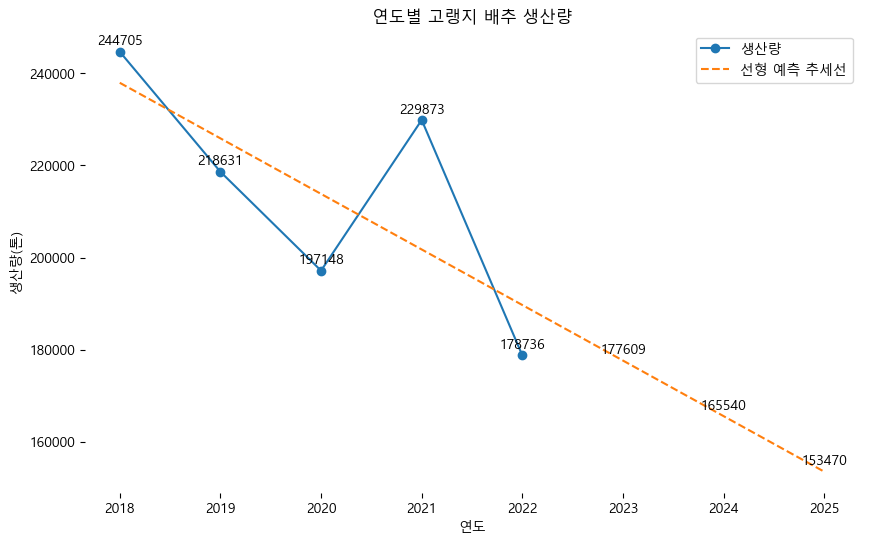

In [34]:
# 엑셀 파일 읽기
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='data1')

years = df.iloc[:, 0]  # 연도
production = df.iloc[:, 1]  # 생산량

# 결측값 제거
data = pd.DataFrame({'Years': years, 'Production': production})
data = data.dropna()

# 선형 회귀 모델 만들기
model = LinearRegression()
years_reshaped = np.array(data['Years']).reshape(-1, 1)
model.fit(years_reshaped, data['Production'])

# 기존 데이터에 대한 예측 값
trend = model.predict(years_reshaped)

# 미래 연도 예측
future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
future_trend = model.predict(future_years)

# 전체 데이터 결합
all_years = np.concatenate([years_reshaped, future_years])
all_trend = np.concatenate([trend, future_trend])

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(data['Years'], data['Production'], label='생산량', marker='o')
plt.plot(all_years, all_trend, label='선형 예측 추세선', linestyle='--')

for i, txt in enumerate(data['Production']):
    plt.annotate(f'{int(txt)}', (data['Years'].iloc[i], data['Production'].iloc[i]), textcoords="offset points", xytext=(0,5), ha='center')

for i, txt in enumerate(future_trend):
    plt.annotate(f'{int(txt)}', (future_years[i], future_trend[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('연도')
plt.ylabel('생산량(톤)')
plt.title('연도별 고랭지 배추 생산량')
plt.legend()

# 눈금선, 테두리 제거
plt.grid(False)
plt.box(False)

plt.show()


재배면적과 생산량이 어쩌고다 작성.

상관계수: 0.71


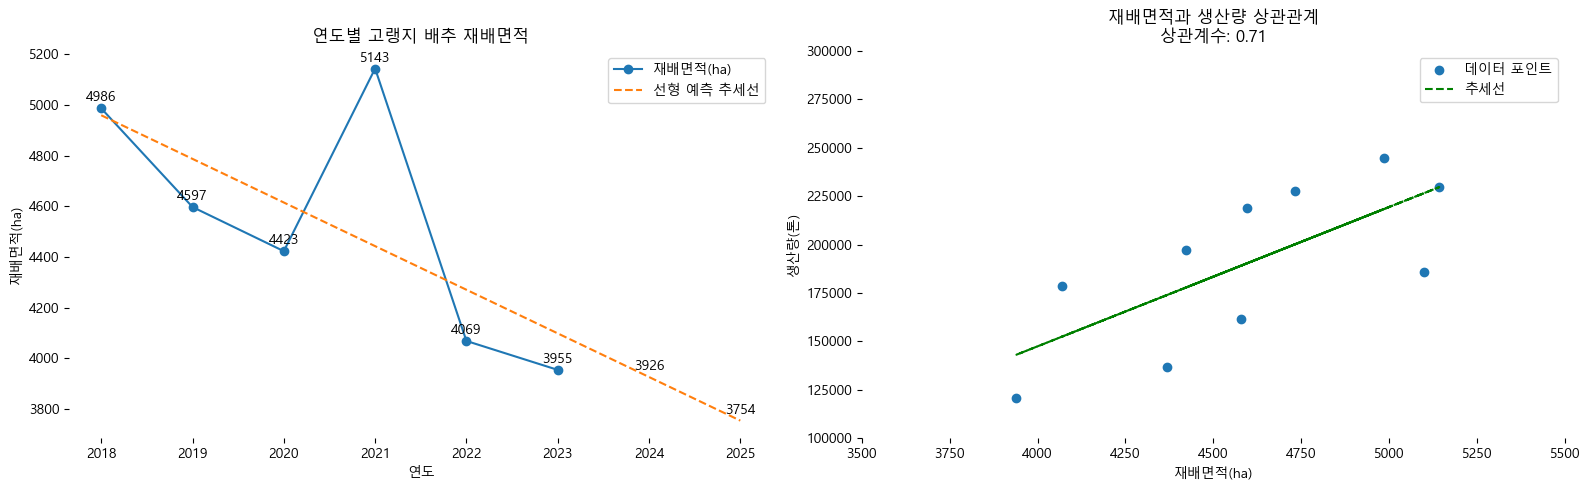

In [110]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'

# 연도별 고랭지 배추 재배면적 꺾은선 그래프
df1 = pd.read_excel(file_path, sheet_name='data1')
years = df1.iloc[:, 10]  # 연도
area = df1.iloc[:, 13]  # 재배면적

data1 = pd.DataFrame({'Years': years, 'Area': area})
data1 = data1.dropna()

model = LinearRegression()
years_reshaped = np.array(data1['Years']).reshape(-1, 1)
model.fit(years_reshaped, data1['Area'])
trend = model.predict(years_reshaped)

future_years = np.array([2024, 2025]).reshape(-1, 1)
future_trend = model.predict(future_years)

all_years = np.concatenate([years_reshaped, future_years])
all_trend = np.concatenate([trend, future_trend])

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(data1['Years'], data1['Area'], label='재배면적(ha)', marker='o')
plt.plot(all_years, all_trend, label='선형 예측 추세선', linestyle='--')

for i, txt in enumerate(data1['Area']):
    plt.annotate(f'{int(txt)}', (data1['Years'].iloc[i], data1['Area'].iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

for i, txt in enumerate(future_trend):
    plt.annotate(f'{int(txt)}', (future_years[i], future_trend[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('연도')
plt.ylabel('재배면적(ha)')
plt.title('연도별 고랭지 배추 재배면적')
plt.legend()
plt.grid(False)
plt.box(False)

# 재배면적과 생산량 분산형 그래프
df2 = pd.read_excel(file_path, sheet_name='data2')
area2 = df2.iloc[:, 1]  # 재배면적
production2 = df2.iloc[:, 2]  # 생산량

data2 = pd.DataFrame({'Area': area2, 'Production': production2})
data2 = data2.dropna()

correlation = data2.corr().loc['Area', 'Production']
print(f'상관계수: {correlation:.2f}')

model2 = LinearRegression()
area2_reshaped = np.array(data2['Area']).reshape(-1, 1)
model2.fit(area2_reshaped, data2['Production'])
trend2 = model2.predict(area2_reshaped)

plt.subplot(1, 2, 2)
plt.scatter(data2['Area'], data2['Production'], label='데이터 포인트', marker='o')
plt.plot(data2['Area'], trend2, label='추세선', linestyle='--', color='Green')

plt.xlabel('재배면적(ha)')
plt.ylabel('생산량(톤)')
plt.title(f'재배면적과 생산량 상관관계\n상관계수: {correlation:.2f}')
plt.legend()
plt.ylim(100000, 300000)
plt.xlim(3500, 5500)
plt.grid(False)
plt.box(False)

plt.tight_layout()
plt.show()


전년도 이윤어쩌고 저쩌고

상관계수: 0.41


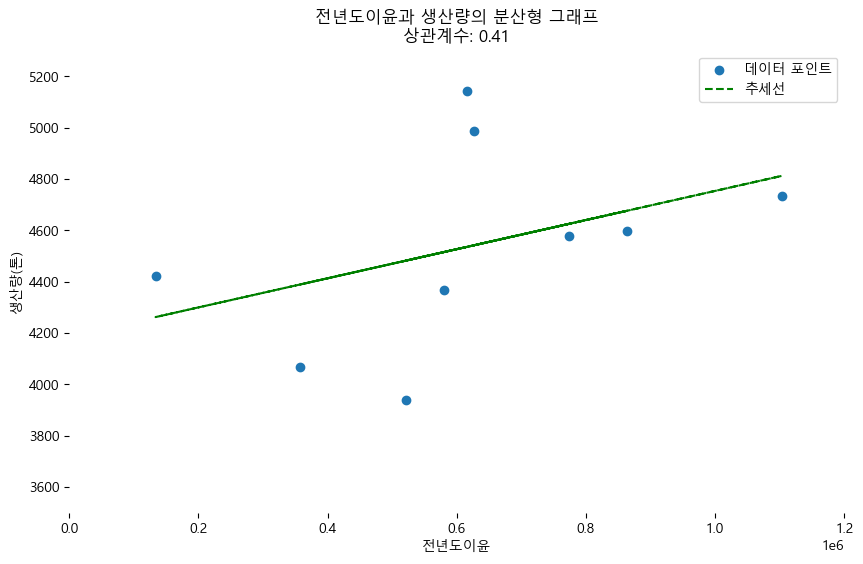

In [113]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='data2')

area2 = df.iloc[:, 5]  # 농가이윤
production2 = df.iloc[:, 6]  # 재배면적

# 결측값 제거
data2 = pd.DataFrame({'Area': area2, 'Production': production2})
data2 = data2.dropna()

# 상관계수 계산
correlation = data2.corr().loc['Area', 'Production']
print(f'상관계수: {correlation:.2f}')

# 선형 회귀 모델 만들기
model2 = LinearRegression()
area2_reshaped = np.array(data2['Area']).reshape(-1, 1)
model2.fit(area2_reshaped, data2['Production'])
trend2 = model2.predict(area2_reshaped)

# 분산형 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(data2['Area'], data2['Production'], label='데이터 포인트', marker='o')
plt.plot(data2['Area'], trend2, label='추세선', linestyle='--', color='green')

plt.xlabel('전년도이윤')
plt.ylabel('생산량(톤)')
plt.title(f'전년도이윤과 생산량의 분산형 그래프\n상관계수: {correlation:.2f}')
plt.legend()
plt.ylim(3500, 5300)
plt.xlim(0, 1200000)

plt.grid(False)
plt.box(False)

plt.show()

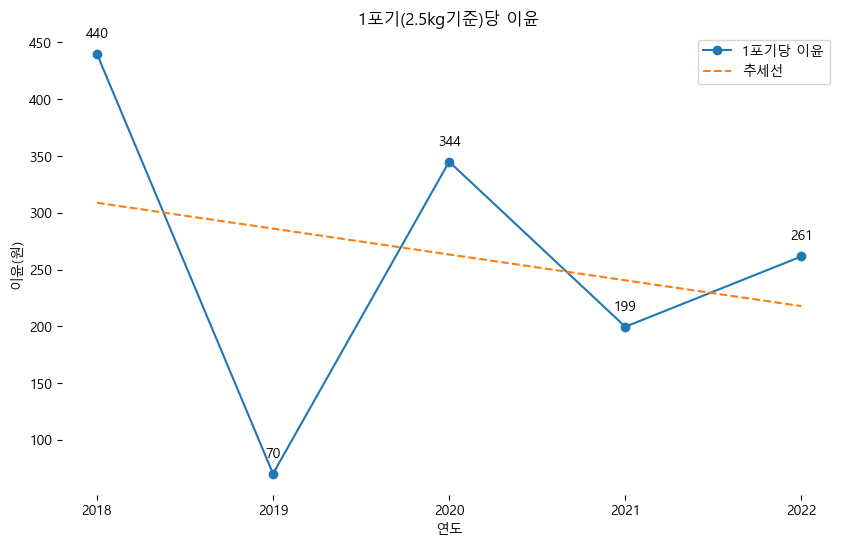

In [ ]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='data1')

years = df.iloc[:, 3]  # 연도
profit = df.iloc[:, 6]  # 1포기당 이윤

# 결측값 제거
data = pd.DataFrame({'Years': years, 'Profit': profit})
data = data.dropna()

# 선형 회귀 모델 만들기
model = LinearRegression()
years_reshaped = np.array(data['Years']).reshape(-1, 1)
model.fit(years_reshaped, data['Profit'])

# 기존 데이터에 대한 예측 값
trend = model.predict(years_reshaped)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(data['Years'], data['Profit'], label='1포기당 이윤', marker='o')
plt.plot(data['Years'], trend, label='추세선', linestyle='--')

for i, txt in enumerate(data['Profit']):
    plt.annotate(f'{int(txt)}', (data['Years'].iloc[i], data['Profit'].iloc[i]), textcoords="offset points", xytext=(0, 12), ha='center')

plt.xticks(ticks=np.arange(min(data['Years']), max(data['Years'])+1, 1), labels=[str(int(year)) for year in np.arange(min(data['Years']), max(data['Years'])+1, 1)])

plt.xlabel('연도')
plt.ylabel('이윤(원)')
plt.title('1포기(2.5kg기준)당 이윤')
plt.legend()

plt.grid(False)
plt.box(False)

plt.show()


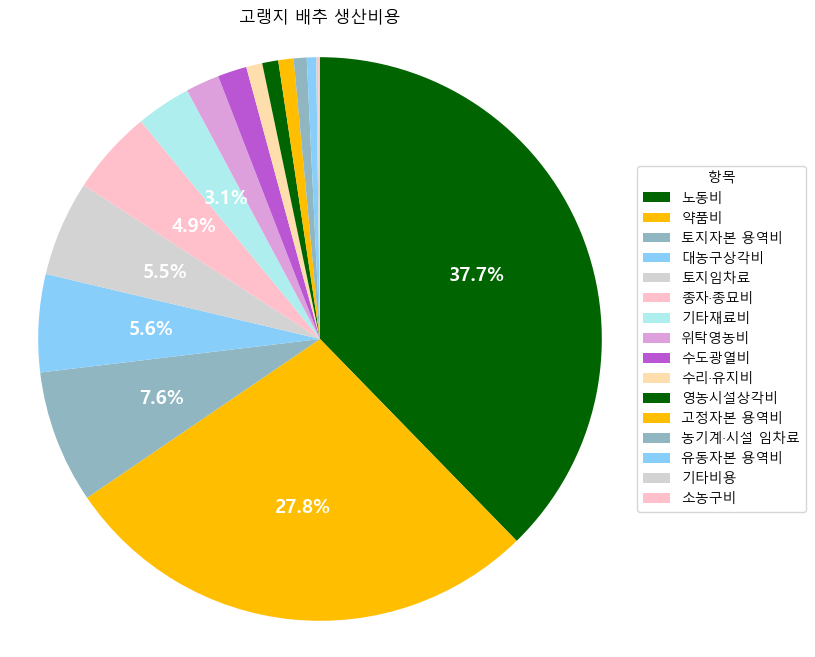

In [ ]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='생산원가')

labels = df.iloc[:, 15]
sizes = df.iloc[:, 16]

# 결측값 제거 및 정렬
data = pd.DataFrame({'Labels': labels, 'Sizes': sizes})
data = data.dropna()
data = data.sort_values(by='Sizes', ascending=False)

colors = ['#006400', '#FFBE00', '#90B6C1', '#87CEFA', '#D3D3D3', '#FFC0CB', '#AFEEEE', '#DDA0DD', '#BA55D3', '#FFDEAD']

# 원형 그래프 그리기
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(data['Sizes'], colors=colors[:len(data)], autopct='', startangle=90, counterclock=False)

total = sum(data['Sizes'])
for i, autotext in enumerate(autotexts):
    if i < 7:
        percent = data['Sizes'].iloc[i] / total * 100
        autotext.set_text(f'{percent:.1f}%')
        autotext.set_color('white')
        autotext.set_fontweight(BOLD)
        autotext.set_fontsize(14)

plt.legend(wedges, data['Labels'], title="항목", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('고랭지 배추 생산비용')
plt.axis('equal')

plt.show()


C:\Users\wwssy\AppData\Local\Temp\ipykernel_19472\1580713632.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('-', np.nan)  # '-'를 결측값으로 변환


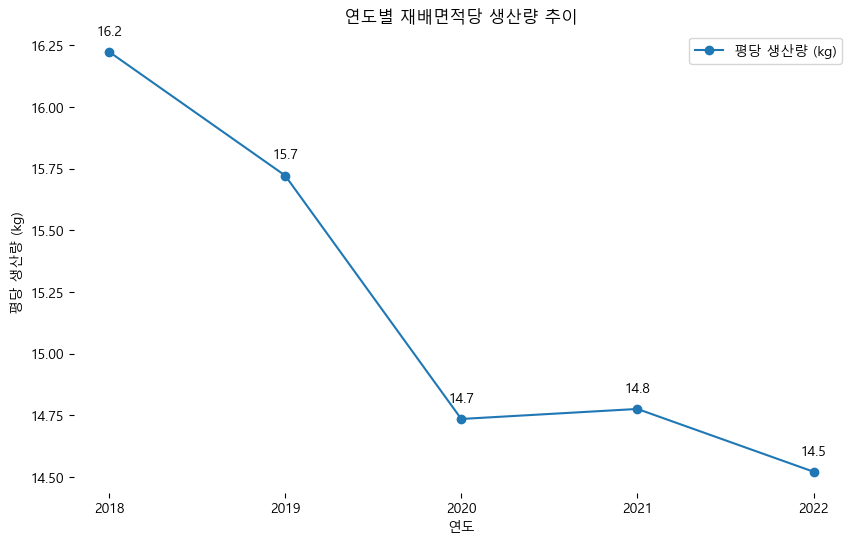

In [ ]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='data1')

years = df.iloc[:, 10]  # 연도
production_per_area = df.iloc[:, 15]  # 평당 생산량 (kg)

# 결측값 제거 및 숫자형 변환
data = pd.DataFrame({'Years': years, 'Production_per_Area': production_per_area})
data = data.replace('-', np.nan)
data = data.dropna().astype(float)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(data['Years'], data['Production_per_Area'], label='평당 생산량 (kg)', marker='o')

for i, txt in enumerate(data['Production_per_Area']):
    plt.annotate(f'{txt:.1f}', (data['Years'].iloc[i], data['Production_per_Area'].iloc[i]), textcoords="offset points", xytext=(0, 12), ha='center')

plt.xticks(ticks=np.arange(int(min(data['Years'])), int(max(data['Years'])) + 1, 1), labels=[str(int(year)) for year in np.arange(int(min(data['Years'])), int(max(data['Years'])) + 1, 1)])

plt.xlabel('연도')
plt.ylabel('평당 생산량 (kg)')
plt.title('연도별 재배면적당 생산량 추이')
plt.legend()

plt.grid(False)
plt.box(False)

plt.show()

In [ ]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='기후와 생산량')

columns_to_analyze = df.iloc[:, 8:13]

# 상관분석
correlation_matrix = columns_to_analyze.corr().round(2)

# 하삼각행렬로 출력
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
tri_df = correlation_matrix.mask(mask)

tri_df = tri_df.applymap(lambda x: '' if pd.isna(x) else f'{x:.2f}')

# 상관분석 표
styled_table = (tri_df
                .style
                .set_caption('상관분석')
                .set_table_styles([{
                    'selector': 'th',
                    'props': [('border', '1px solid black'), ('text-align', 'center')]
                }, {
                    'selector': 'td',
                    'props': [('border', '1px solid black'), ('text-align', 'center')]
                }, {
                    'selector': 'caption',
                    'props': [('font-size', '16px')]
                }])
                .set_properties(**{'border': '1px solid black', 'text-align': 'center'}))

print("상관분석:")
display(styled_table)


상관분석:


C:\Users\wwssy\AppData\Local\Temp\ipykernel_19472\1725941608.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tri_df = tri_df.applymap(lambda x: '' if pd.isna(x) else f'{x:.2f}')


,최고기온,최저기온,강수일수,30도 이상 일수,면적대비 수확량(생산효율)
최고기온,1.00,,,,
최저기온,0.21,1.00,,,
강수일수,-0.15,-0.23,1.00,,
30도 이상 일수,0.55,0.33,-0.33,1.00,
면적대비 수확량(생산효율),-0.02,-0.11,-0.30,-0.04,1.00


In [ ]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='기후와 생산량')

X = df.iloc[:, 8:12]  # 독립 변수
y = df.iloc[:, 12]    # 종속 변수

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

# F-검정 결과
f_pvalue = model.f_pvalue

print("\n\nF-검정 결과:")
print(f"P-value: {f_pvalue:.4f}")
if f_pvalue <= 0.05:
    print("회귀 모델이 유의미합니다 (P-value <= 0.05).")
else:
    print("회귀 모델이 유의미하지 않습니다 (P-value > 0.05).")


                            OLS Regression Results                            
Dep. Variable:         면적대비 수확량(생산효율)   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     2.037
Date:                Fri, 22 Nov 2024   Prob (F-statistic):              0.103
Time:                        20:00:05   Log-Likelihood:                -2.0091
No. Observations:                  57   AIC:                             14.02
Df Residuals:                      52   BIC:                             24.23
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7012      1.031      0.680      0.5

In [ ]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='기후와 생산량')

X = df.iloc[:, 9:12]  # 독립 변수
y = df.iloc[:, 12]    # 종속 변수

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

# F-검정 결과
f_pvalue = model.f_pvalue

print("\n\nF-검정 결과:")
print(f"P-value: {round(f_pvalue, 2):.2f}")
if round(f_pvalue, 2) <= 0.05:
    print("회귀 모델이 유의미합니다 (P-value <= 0.05)")
else:
    print("회귀 모델이 유의미하지 않습니다 (P-value > 0.05)")


                            OLS Regression Results                            
Dep. Variable:         면적대비 수확량(생산효율)   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     2.758
Date:                Fri, 22 Nov 2024   Prob (F-statistic):             0.0512
Time:                        20:01:51   Log-Likelihood:                -2.0226
No. Observations:                  57   AIC:                             12.05
Df Residuals:                      53   BIC:                             20.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8608      0.183      4.707      0.0

C:\Users\wwssy\AppData\Local\Temp\ipykernel_19472\1286578083.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope, intercept = model.params[1], model.params[0]


회귀계수: 기울기 = -0.02, 절편 = 0.61


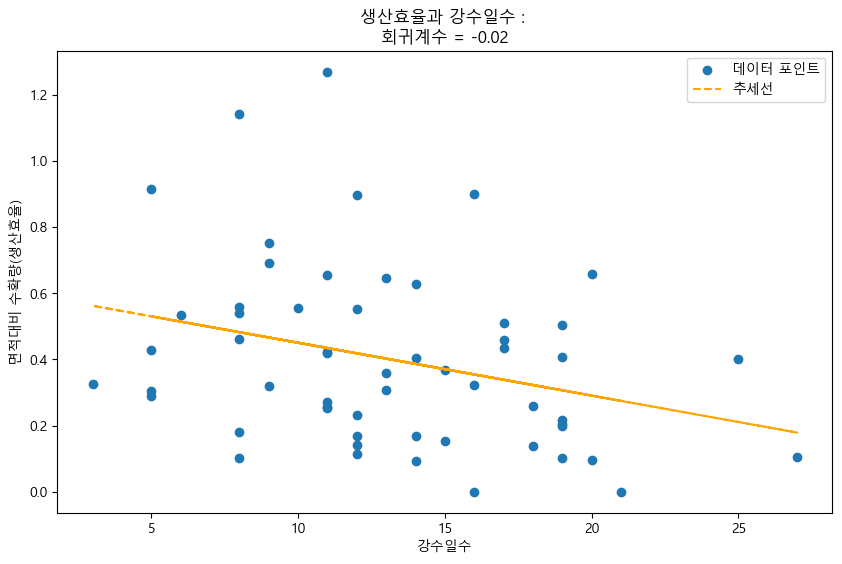

In [112]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='기후와 생산량')

x = df.iloc[:, 10]  # 강수일수
y = df.iloc[:, 12]  # 생산효율

data = pd.DataFrame({'x': x, 'y': y}).dropna()

# 회귀 분석
X = sm.add_constant(data['x'])
model = sm.OLS(data['y'], X).fit()

slope, intercept = model.params[1], model.params[0]
correlation = np.corrcoef(data['x'], data['y'])[0, 1]
print(f"회귀계수: 기울기 = {slope:.2f}, 절편 = {intercept:.2f}")

data['trend'] = intercept + slope * data['x']

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], label='데이터 포인트')
plt.plot(data['x'], data['trend'], label='추세선', color='Orange', linestyle='--')

plt.xlabel('강수일수')
plt.ylabel('면적대비 수확량(생산효율)')
plt.title(f'생산효율과 강수일수 : \n회귀계수 = {slope:.2f}')
plt.legend()

plt.show()